In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
    

In [3]:
# dataset paths

DATASET_PATH_DEF = "/root/datasets/casting product image data for quality inspection/dataset/casting_512x512/casting_512x512/def_front"
DATASET_PATH_OK = "/root/datasets/casting product image data for quality inspection/dataset/casting_512x512/casting_512x512/ok_front"


In [49]:
def load_all_images(path):
    """
    load all images in the given path
    into a tuple and return
    """

    image_paths = [os.path.join(path, f) for f in os.listdir(path)]
    img_num = len(image_paths)
    print(f"num of images: {img_num}")

    if img_num:
        print(image_paths[0])
        img_1 = cv2.imread(image_paths[0])

        images = np.zeros((img_num, img_1.shape[0], img_1.shape[1], img_1.shape[2]), dtype="uint8")
        images[0, :, :, :] = img_1

        for i in range(1, img_num):
            img = mpimg.imread(image_paths[i])
            #print(f' opencv img shape: {img.shape}')
            images[i, :, :, :] = img
    else:
        print("no images found")

    return images

In [50]:
images = load_all_images(DATASET_PATH_DEF)

print(images.shape)

images_r = images[:, :, :, 0]
images_g = images[:, :, :, 1]
images_b = images[:, :, :, 2]

print(np.allclose(images_r, images_g))

rgb_mean = [np.mean(images_r), np.mean(images_g), np.mean(images_b)]

print(f"rgb mean: {rgb_mean}")


num of images: 781
/root/datasets/casting product image data for quality inspection/dataset/casting_512x512/casting_512x512/def_front/cast_def_0_959.jpeg
(781, 512, 512, 3)
True
rgb mean: [138.55649767398225, 138.55649767398225, 138.55649767398225]


<Figure size 432x288 with 0 Axes>

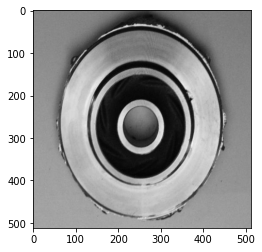

In [26]:
plt.figure()
f, window = plt.subplots(1,1,figsize=(10,4)) 
window.imshow(images[56, :, :, :])

True


<Figure size 432x288 with 0 Axes>

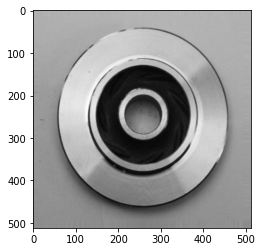

In [51]:
plt.figure()
f, window = plt.subplots(1,1,figsize=(10,4))

print(np.allclose(images[57, :, :, 0], images[57, :, :, 1]))

window.imshow(images[57, :, :])

In [2]:
img = Image.open("/root/assets/sagemaker-architecture.png").convert('LA')

(726, 859)


<Figure size 432x288 with 0 Axes>

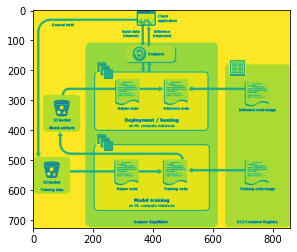

In [14]:
plt.figure()
f, window = plt.subplots(1,1,figsize=(10,4))

img = np.array(img)[:, :, 0]
print(img.shape)

window.imshow(img)


In [17]:
img_rgb = np.stack([img, img, img], axis=2)
print(img_rgb.shape)

(726, 859, 3)


<Figure size 432x288 with 0 Axes>

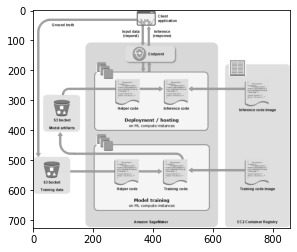

In [18]:
plt.figure()
f, window = plt.subplots(1,1,figsize=(10,4))

window.imshow(img_rgb)